In [1]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run -i preproc.py

/home/jaidevd/src/ceda/preproc.py:5: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/female_paid_activity.csv")


In [3]:
df.shape

(37517, 104)

In [4]:
import numpy as np

In [5]:
otypes = df.columns[df.dtypes == np.dtype('O')]
otypes

Index(['FOD_Sub_Region', 'unpaid_tag', 'industry_of_work__2_digit_of_NIC',
       'Land_possessed_as_on_date_of_sur'],
      dtype='object')

In [14]:
del df['FOD_Sub_Region']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
otypes = df.columns[df.dtypes == np.dtype('O')]
otypes

Index(['unpaid_tag', 'industry_of_work__2_digit_of_NIC',
       'Land_possessed_as_on_date_of_sur'],
      dtype='object')

In [19]:
lencs = {}
xCat = []
for c in otypes:
    enc = LabelEncoder()
    lencs[c] = enc
    yEnc = enc.fit_transform(df[c])
    xCat.append(yEnc)
# lenc = LabelEncoder()
# lenc.fit_transform(df[otypes])

In [20]:
xNum = df.drop(otypes, axis=1)

In [27]:
xCat = pd.DataFrame(np.vstack(xCat).T, columns=otypes)
xCat

,unpaid_tag,industry_of_work__2_digit_of_NIC,Land_possessed_as_on_date_of_sur
0,9,1,1
1,9,1,1
2,9,9,1
3,9,39,1
4,9,13,1
...,...,...,...
37512,9,9,1
37513,9,0,1
37514,9,0,1
37515,9,0,1


In [29]:
X = pd.concat((xNum, xCat), axis=1)

In [30]:
from sklearn.model_selection import cross_val_score

In [45]:
XX = X.fillna(0)

In [86]:
mkt = [c for c in X if 'mkt_time' in c.lower()]
XX = XX.drop(mkt, axis=1)

In [87]:
cross_val_score(DecisionTreeRegressor(max_features='sqrt', max_depth=35, min_samples_leaf=5), XX, y).mean()

0.901600590243057

In [88]:
dt = DecisionTreeRegressor(max_features='sqrt', max_depth=35, min_samples_leaf=5)
dt.fit(XX, y)

DecisionTreeRegressor(max_depth=35, max_features='sqrt', min_samples_leaf=5)

In [89]:
cross_val_score(DecisionTreeRegressor(max_features='sqrt', max_depth=35, min_samples_leaf=5), XX,  y, scoring='neg_mean_squared_error').mean()

-3369.637296312206

In [90]:
imp = pd.Series(dt.feature_importances_, index=dt.feature_names_in_)

In [91]:
imp.sort_values(ascending=False).head(20)

residual_time                       0.470911
n_sna_time                          0.285968
emp_time                            0.074703
sna_time                            0.061483
livestock_time                      0.012456
unpaid_activity                     0.010871
cooking_time                        0.009518
washing_time                        0.005494
livestock                           0.005194
usual_principal_activity__status    0.004779
Land_possessed_as_on_date_of_sur    0.004200
industry_of_work__2_digit_of_NIC    0.004001
collection_preparation_time         0.003466
leisure_time                        0.003261
cleaning_time                       0.003108
water                               0.002560
child_care                          0.002362
psu                                 0.002251
collection_time                     0.002119
water_time                          0.001780
dtype: float64

In [93]:
from sklearn.tree import plot_tree

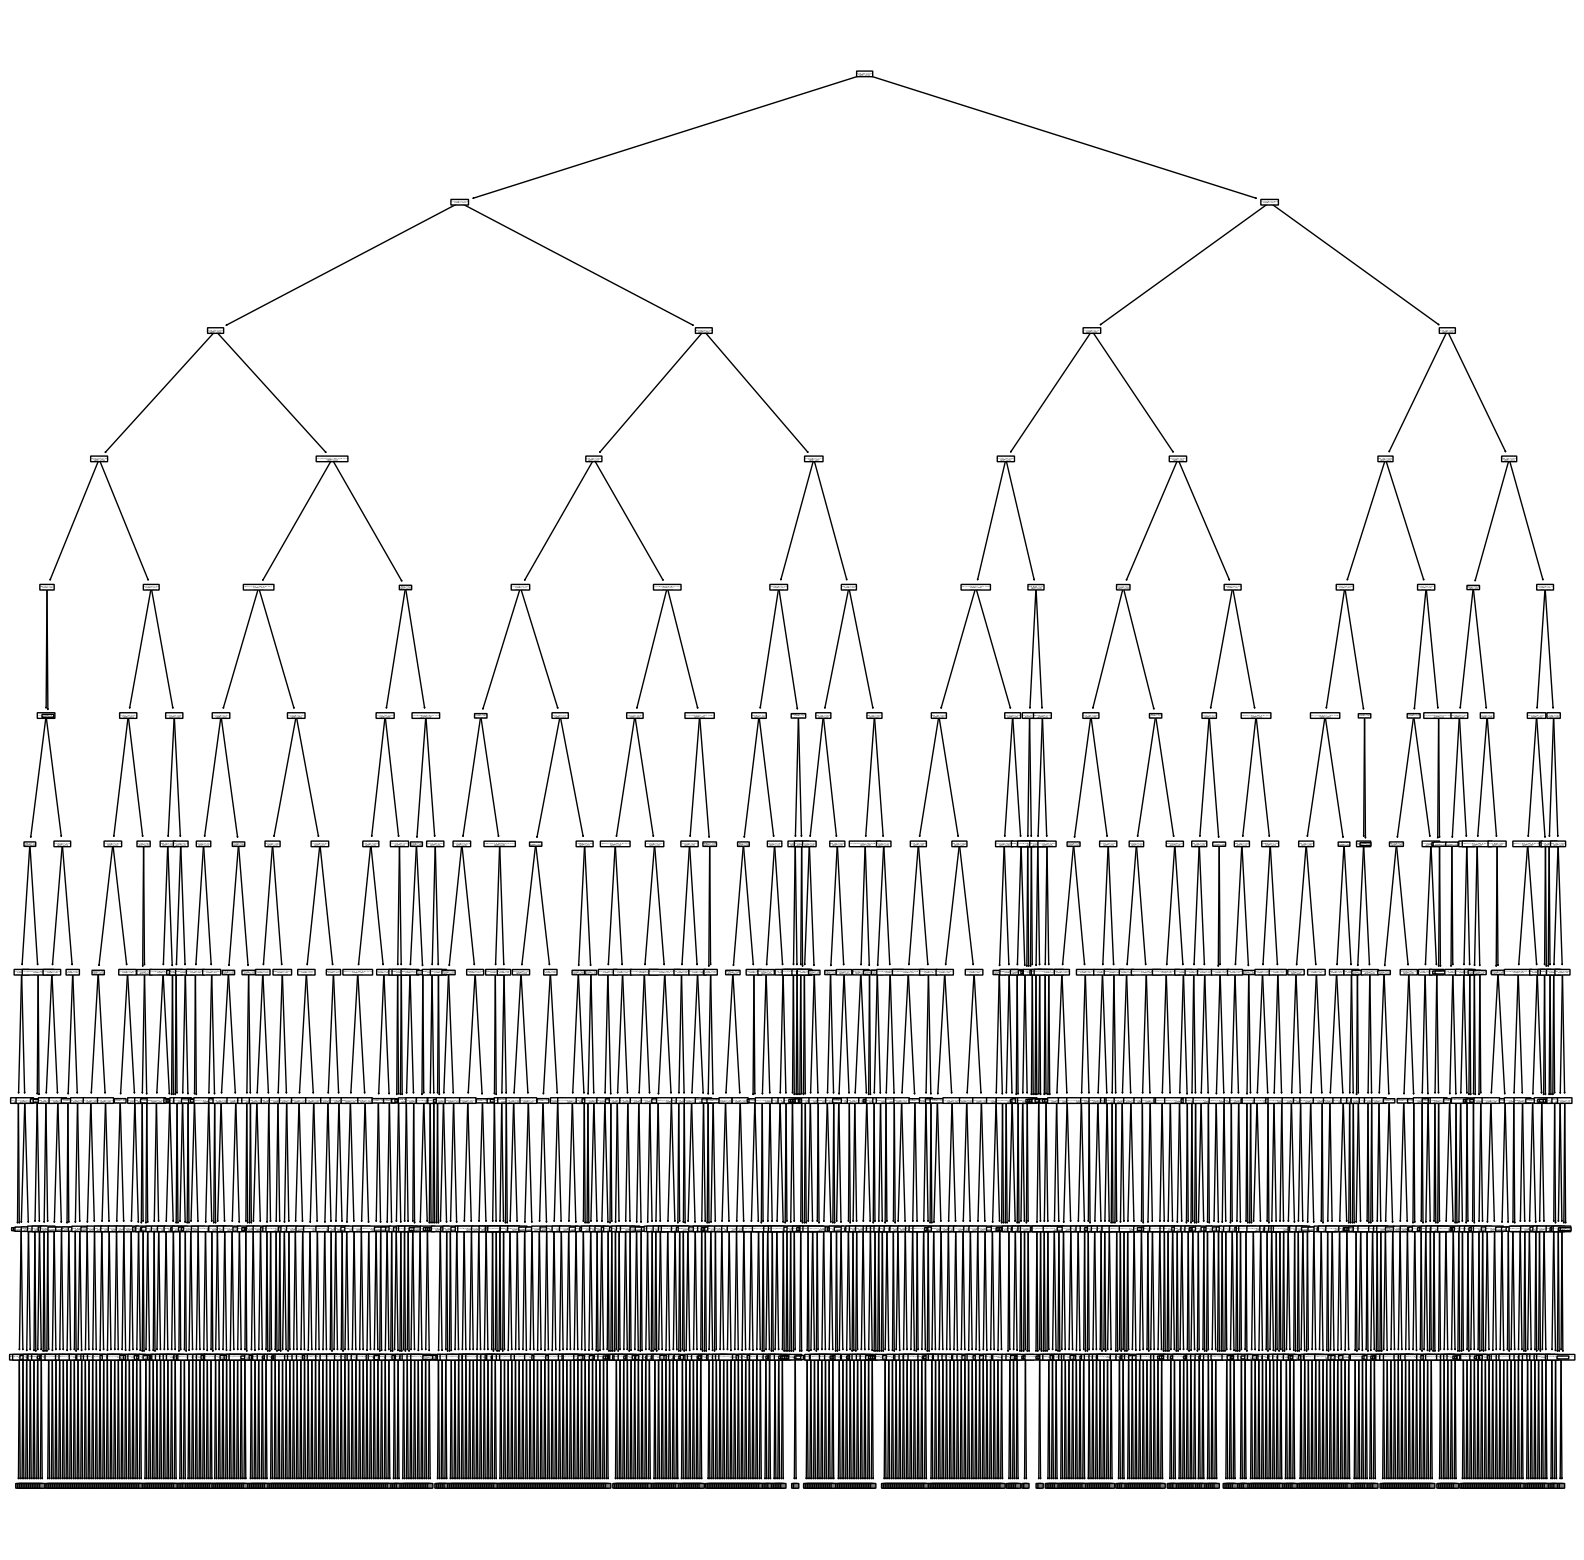

In [95]:
fig, ax = plt.subplots(figsize=(20, 20))
_ = plot_tree(dt, max_depth=10, feature_names=dt.feature_names_in_, impurity=False, node_ids=False, rounded=True, precision=2, ax=ax)
plt.savefig('/tmp/tree.png')

In [100]:
XX.columns

Index(['psu', 'Sector', 'NSS_Region', 'District', 'Stratum', 'Sub_Stratum',
       'age', 'whether_performed_multiple_activ',
       'whether_simultaneous_activity', 'whether_a_major_activity',
       'activity_group', 'where_the_activity_was_performed', 'paid_status',
       'enterprise_type', 'NSC', 'MULT', 'start_time', 'end_time',
       'non_adjusted_mins', 'act_time', 'child_care_time', 'adult_care_time',
       'emp_time', 'sna_time', 'n_sna_time', 'other_time', 'cooking_time',
       'collection_time', 'collection_preparation_time', 'cleaning_time',
       'livestock_time', 'firewood_time', 'water_time', 'washing_time',
       'residual_time', 'leisure_time', 'unpaid_sna_time', 'marital_status',
       'education', 'usual_principal_activity__status', 'weight_level2',
       'child', 't_child', 'old', 'n_working_women', 'old_child',
       'Household_size', 'religion', 'Social_group_', 'MPCE',
       'Primary_source_of_energey_for_co', 'Primary_source_of_energey_for_li',
       

In [102]:
to_drop = ['psu', 'Sector', 'NSS_Region', 'District', 'Stratum', 'Sub_Stratum', 'sector']
XX.drop(to_drop, axis=1, inplace=True)

In [106]:
XX.drop(['weight_level2', 'weight_level2'], axis=1, inplace=True)

In [177]:
cross_val_score(DecisionTreeRegressor(max_depth=5, min_samples_leaf=10), XX, y).mean()

0.9836036780091166

In [178]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
dt.fit(XX, y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [179]:
cross_val_score(dt, XX, y, scoring='neg_mean_squared_error')

array([-437.6013468 , -380.23096876, -412.2808842 , -298.00286043,
       -290.82521948])

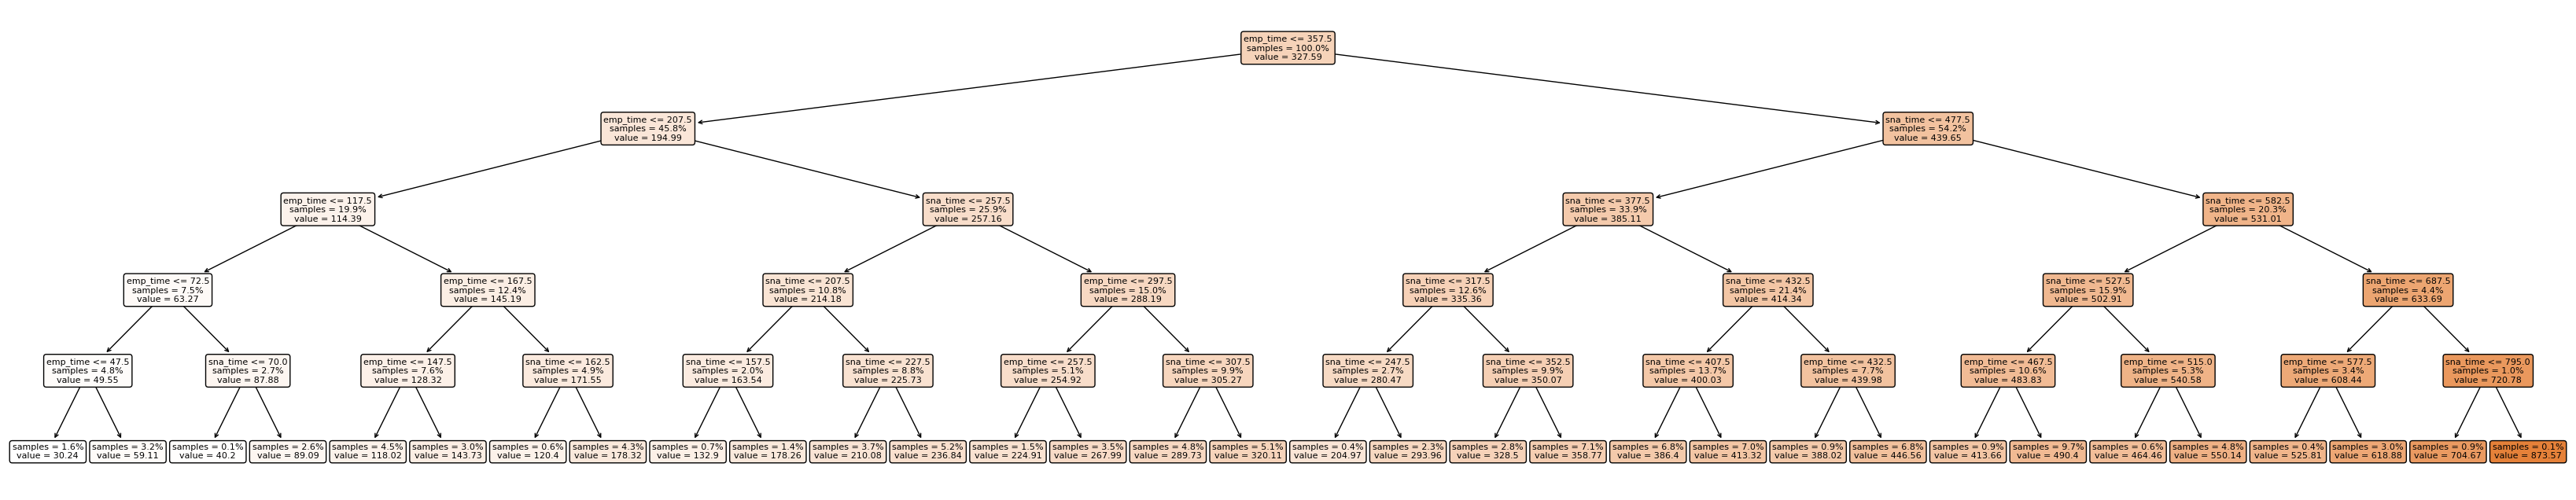

In [180]:
fig, ax = plt.subplots(figsize=(42, 8))
_ = plot_tree(dt, max_depth=10, feature_names=dt.feature_names_in_, filled=True, impurity=False, node_ids=False, proportion=True, rounded=True, precision=2, ax=ax, fontsize=8)
# plt.savefig('/tmp/tree.png')

In [158]:
dt.feature_names_in_[dt.feature_importances_.argsort()[::-1]]

array(['emp_time', 'sna_time', 'Land_possessed_as_on_date_of_sur',
       'other_time', 'collection_time', 'collection_preparation_time',
       'cleaning_time', 'livestock_time', 'firewood_time', 'water_time',
       'washing_time', 'residual_time', 'leisure_time', 'unpaid_sna_time',
       'marital_status', 'education', 'usual_principal_activity__status',
       'child', 't_child', 'cooking_time', 'n_sna_time',
       'n_working_women', 'enterprise_type',
       'whether_performed_multiple_activ',
       'whether_simultaneous_activity', 'whether_a_major_activity',
       'activity_group', 'where_the_activity_was_performed',
       'paid_status', 'NSC', 'adult_care_time', 'MULT', 'start_time',
       'end_time', 'non_adjusted_mins', 'act_time', 'child_care_time',
       'old', 'old_child', 'industry_of_work__2_digit_of_NIC',
       'generation', 'water', 'washing_clothes', 'unpaid_activity',
       'unpaid_sna', '_merge', 'state_codes', 'MPCE_qrt', 'pweight',
       'Household_size', 

In [170]:
cross_val_score(dt, XX, y).mean()

0.9832796089428026

In [171]:
cross_val_score(dt, XX, y, scoring='neg_mean_squared_error').mean()

-371.54888758952626

In [181]:
feats = pd.Series(dt.feature_importances_, index=dt.feature_names_in_)

<Axes: >

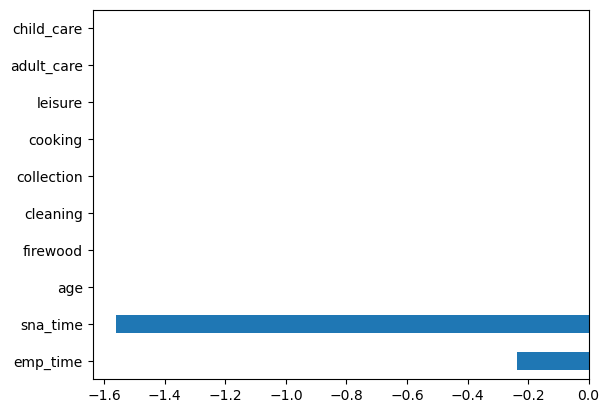

In [182]:
feats.sort_values(ascending=False).apply(np.log).head(10).plot(kind='barh')

In [183]:
feats.sort_values(ascending=False)

emp_time                            0.78999
sna_time                            0.21001
age                                 0.00000
firewood                            0.00000
cleaning                            0.00000
                                     ...   
water_time                          0.00000
firewood_time                       0.00000
livestock_time                      0.00000
cleaning_time                       0.00000
Land_possessed_as_on_date_of_sur    0.00000
Length: 77, dtype: float64